# 점 추정
## 패키지 Import

In [1]:
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

## 1. 평균의 점추정

In [14]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import math
# import scipy.stats as st

### 1) 데이터 생성


In [ ]:
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size=500), columns=['점수'])

### 2) 데이터 탐색

In [4]:
# 요약정보
math_score.describe()

,점수
count,500.000000
mean,61.580000
std,21.513374
min,25.000000
25%,42.000000
50%,62.500000
75%,79.000000
max,100.000000


In [5]:
# 데이터 확인
scores = np.array(math_score['점수'])
scores[:5]

array([33, 49, 92, 73, 35])

In [6]:
# 20개 샘플 추출(복원추출)
sample = np.random.choice(scores, 20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std()) # np.std(sample) # 편향 표본표준편차

[85 91 85 81 64 96 83 68 53 52 61 80 89 32 95 64 81 72 94 92]
75.9
282.29
16.801488029338355


In [7]:
# 표본에 따라 평균 오차 확인
for i in range(10) : 
    sample1 = np.random.choice(scores, 20)
    print(i + 1, '표본평균', sample1.mean())

1 표본평균 67.0
2 표본평균 61.55
3 표본평균 59.55
4 표본평균 62.6
5 표본평균 57.95
6 표본평균 57.8
7 표본평균 59.85
8 표본평균 65.05
9 표본평균 60.0
10 표본평균 63.05


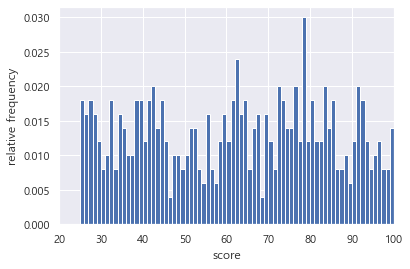

In [8]:
# 모집단 데이터 분포 확인
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.hist(scores, bins=100, range=(0, 100), density=True) # density = Treu면 상대도수
plt.xlim(20, 100)
plt.show()

In [9]:
# 샘플  10000개 생성하여 분포 확인
sample_score = np.random.choice(scores, 10000)

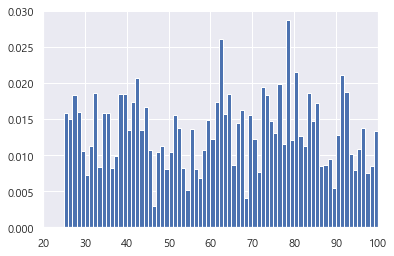

In [10]:
plt.hist(sample_score, bins=100, range=(0, 100), density=True) # density = Treu면 상대도수
plt.xlim(20, 100)
plt.show()

### 3) 모평균 점 추정

In [11]:
# 20개(n)의 표본 100번 추출
n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores, n).mean() for _ in range(nSample)])

In [12]:
# 표본평균 분포 확인
sample_mean

array([63.9 , 62.65, 63.4 , 57.4 , 56.75, 60.35, 55.15, 67.2 , 58.15,
       64.15, 67.7 , 58.45, 58.1 , 60.5 , 58.3 , 63.2 , 65.  , 63.1 ,
       58.75, 70.2 , 61.3 , 60.95, 55.4 , 62.25, 62.7 , 62.8 , 61.05,
       71.3 , 56.8 , 73.4 , 63.  , 63.15, 65.6 , 64.35, 61.55, 74.35,
       51.85, 58.9 , 57.1 , 57.1 , 52.8 , 65.8 , 68.9 , 62.75, 54.4 ,
       57.95, 62.7 , 60.15, 64.15, 61.4 , 71.75, 54.4 , 60.5 , 59.85,
       57.3 , 61.3 , 55.95, 67.45, 62.45, 61.8 , 55.2 , 61.85, 71.1 ,
       62.85, 69.7 , 58.15, 49.75, 58.85, 67.2 , 67.5 , 68.65, 56.1 ,
       62.8 , 58.  , 57.75, 59.2 , 55.35, 67.5 , 56.9 , 59.3 , 67.15,
       50.75, 63.4 , 72.2 , 60.6 , 67.3 , 50.45, 69.55, 69.85, 63.1 ,
       62.1 , 64.8 , 70.7 , 71.25, 58.9 , 63.9 , 62.65, 65.2 , 64.9 ,
       61.  ])

In [15]:
# 모평균
print('모평균 :', scores.mean())

# 표본평균의 평균 <= 모집단을 모를 경우 표본평균이 모수로 추정
print('표본평균의 평균 :', sample_mean.mean())

# 모분산/n
print('모분산/n :', scores.var()/n)

# 표본평균의 분산
print('표본평균의 분산 :', sample_mean.var())

# 표본평균의 편차
print('표본평균의 표준편차 :', sample_mean.std())

# 표준오차 : standard error of the mean
print('표준오차 :', scores.std()/math.sqrt(n))

모평균 : 61.58
표본평균의 평균 : 62.04499999999999
모분산/n : 23.09498
표본평균의 분산 : 28.156875000000003
표본평균의 표준편차 : 5.306305211726895
표준오차 : 4.805723670790903
